In [2]:
from tensorflow.compat.v1 import ConfigProto,InteractiveSession
config=ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction=0.5
config.gpu_options.allow_growth=True
session=InteractiveSession(config=config)

/Users/macbook/Desktop/django/chat_app/env/lib/python3.9/site-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [5]:
training_set=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,)
training_data=training_set.flow_from_directory(r'/Users/macbook/Desktop/django/our/',
                                              target_size=(224,224),
                                              class_mode='categorical',
                                              batch_size=16)
print(training_data)


Found 454 images belonging to 4 classes.


In [6]:
print(training_data.class_indices)

{'rajitha': 0, 'rohan': 1, 'sree': 2, 'varun': 3}


In [30]:
#cnn vgg16 architecture

model=tf.keras.models.Sequential()
#first set
model.add(tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(224,224,3)))
model.add(tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2),padding='same'))


#second set
model.add(tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2),padding='same'))

#third set
model.add(tf.keras.layers.Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2),padding='same'))

#fourth set
model.add(tf.keras.layers.Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2),padding='same'))

#fifth set
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(4096,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(4,activation='softmax'))



In [5]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
history=model.fit(x=training_data,epochs=10,verbose=1)

Epoch 1/10
29/29 [==============================] - 149s 5s/step - loss: 1.1579 - accuracy: 0.7863
Epoch 2/10
29/29 [==============================] - 147s 5s/step - loss: 0.6676 - accuracy: 0.8392
Epoch 3/10
29/29 [==============================] - 194s 7s/step - loss: 0.6131 - accuracy: 0.8392
Epoch 4/10
29/29 [==============================] - 173s 6s/step - loss: 0.6105 - accuracy: 0.8392
Epoch 5/10
29/29 [==============================] - 171s 6s/step - loss: 0.6005 - accuracy: 0.8392
Epoch 6/10
29/29 [==============================] - 184s 6s/step - loss: 0.6124 - accuracy: 0.8392
Epoch 7/10
29/29 [==============================] - 185s 6s/step - loss: 0.6012 - accuracy: 0.8392
Epoch 8/10
29/29 [==============================] - 194s 7s/step - loss: 0.6005 - accuracy: 0.8392
Epoch 9/10
29/29 [==============================] - 198s 7s/step - loss: 0.6070 - accuracy: 0.8392
Epoch 10/10
29/29 [==============================] - 198s 7s/step - loss: 0.6073 - accuracy: 0.8392


In [7]:
history.model.save(r'family.h5')

In [11]:
model=tf.keras.models.load_model('family.h5');

[[0.85890985 0.09383005 0.03254786 0.01471237]]


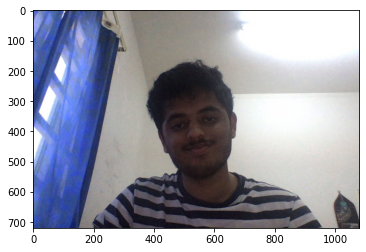

dadd


In [12]:
from PIL import Image
import numpy as np
test_image=r'/Users/macbook/Desktop/django/my_self.jpg'
open_image=Image.open(test_image)
test_image=tf.keras.preprocessing.image.load_img(path=test_image,target_size=(224,224))
test_image=tf.keras.preprocessing.image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(result)

dir={
    '0':'dadd',
    '1':'rohan',
    '2':'Daddy',
    '3':'bunny',
}
import matplotlib.pyplot as plt
plt.imshow(open_image)
plt.show()
index=np.argmax(result)
        
    
print(dir[str(index)])
       